In [1]:
import numpy as np
import pymc
import scipy as sp
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import uniform,beta


In [3]:
# @pymc.stochastic(dtype=np.float64)
# def beta_priors(value=[1.0, 1.0]):
#     a, b = value
#     if a <= 0 or b <= 0:
#         return -np.inf
#     else:
#         return np.log(np.power((a + b), -2.5))

a = 1
b = 1

#The hidden, true rate for each website.
true_rates = pymc.Beta('true_rates', a, b, size=5)

# for i in range(5):
#     sns.kdeplot(mcmc.trace('true_rates')[:][:,i], shade = True, label = "Website %s" % chr(65+i))
# plt.savefig("test.png", format = "PNG")

# This is what we observed
trials = np.array([1055, 1057, 1065, 1039, 1046])
successes = np.array([500, 45, 69, 58, 60])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)


 [-----------------100%-----------------] 1000000 of 1000000 complete in 49.6 sec

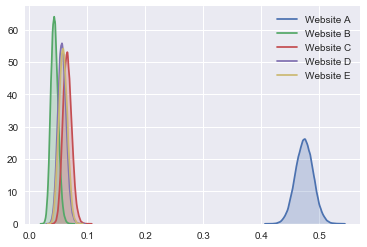

In [4]:
for i in range(5):
    sns.kdeplot(mcmc.trace('true_rates')[:][:,i], shade = True, label = "Website %s" % chr(65+i))
plt.savefig("five_hier.png", format = "PNG")

In [5]:
diff_BA = mcmc.trace('true_rates')[:][:,1] - mcmc.trace('true_rates')[:][:,0]
sns.kdeplot(diff_CA, shade = True, label = "Difference site B - site A")
plt.axvline(0.0, color = 'black')
plt.savefig("hierarchial_BA.png", format = "PNG")

NameError: name 'diff_CA' is not defined

In [6]:
print ("Probability that website A gets MORE sign-ups than website B: %0.3f" % (diff_BA < 0).mean())
print ("Probability that website A gets LESS sign-ups than website B: %0.3f" % (diff_BA > 0).mean())

Probability that website A gets MORE sign-ups than website B: 1.000
Probability that website A gets LESS sign-ups than website B: 0.000


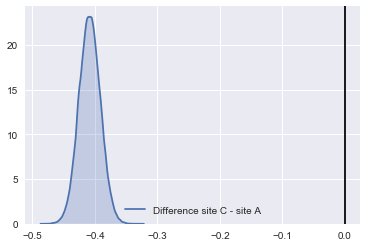

In [7]:
diff_CA = mcmc.trace('true_rates')[:][:,2] - mcmc.trace('true_rates')[:][:,0]
sns.kdeplot(diff_CA, shade = True, label = "Difference site C - site A")
plt.axvline(0.0, color = 'black')
plt.savefig("hierarchial_CA.png", format = "PNG")

In [8]:
print ("Probability that website A gets MORE sign-ups than website C: %0.3f" % (diff_CA < 0).mean())
print ("Probability that website A gets LESS sign-ups than website C: %0.3f" % (diff_CA > 0).mean())

Probability that website A gets MORE sign-ups than website C: 1.000
Probability that website A gets LESS sign-ups than website C: 0.000


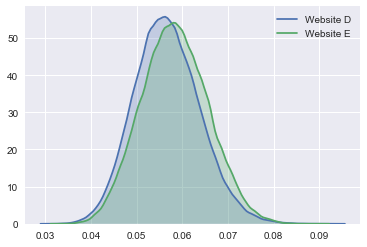

In [9]:
for i in range(3,5):
    sns.kdeplot(mcmc.trace('true_rates')[:][:,i], shade = True, label = "Website %s" % chr(65+i))
plt.savefig("ED_dist.png", format = "PNG")